## Configuration and import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install pm4py
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/trello-logs/CSVs-completos.zip .
!cp /content/drive/MyDrive/trello-logs/bomi.py .
!unzip CSVs-completos.zip

     |████████████████████████████████| 1.8 MB 5.4 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23596 sha256=226d3f0eb5d0529a9fa7156785b71c514a186ac4f844aedf2a1646177ffb804d
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist
Mounted at /content/drive
Archive:  CSVs-completos.zip
   creating: CSVs-completos/
  inflating: __MACOSX/._CSVs-completos  
  inflating: CSVs-completos/Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: __MACOSX/CSVs-completos/._Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: CSVs-completos/speleo.se.csv  
  inflating: __MACOSX/CSVs-completos/._speleo.se.csv  
  inflating: CSVs-completos/浙江任务.csv  
  inflating: __MACOSX/CSVs-completos/._浙江任务.csv  
  inflating: CSVs-completos/Iishee orooroi.csv  
  inflating: __MACOSX/CSVs-completos/._Iishee orooroi.csv  
  

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Individual analysis

In [6]:
#Board reading
# Trello URL: https://trello.com/b/5aOH4KDa
df = bomi.load_board("5aOH4KDa")
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
cl = bomi.connected_lists(df, use='comb', threshold=0)
df.shape

(8689, 95)

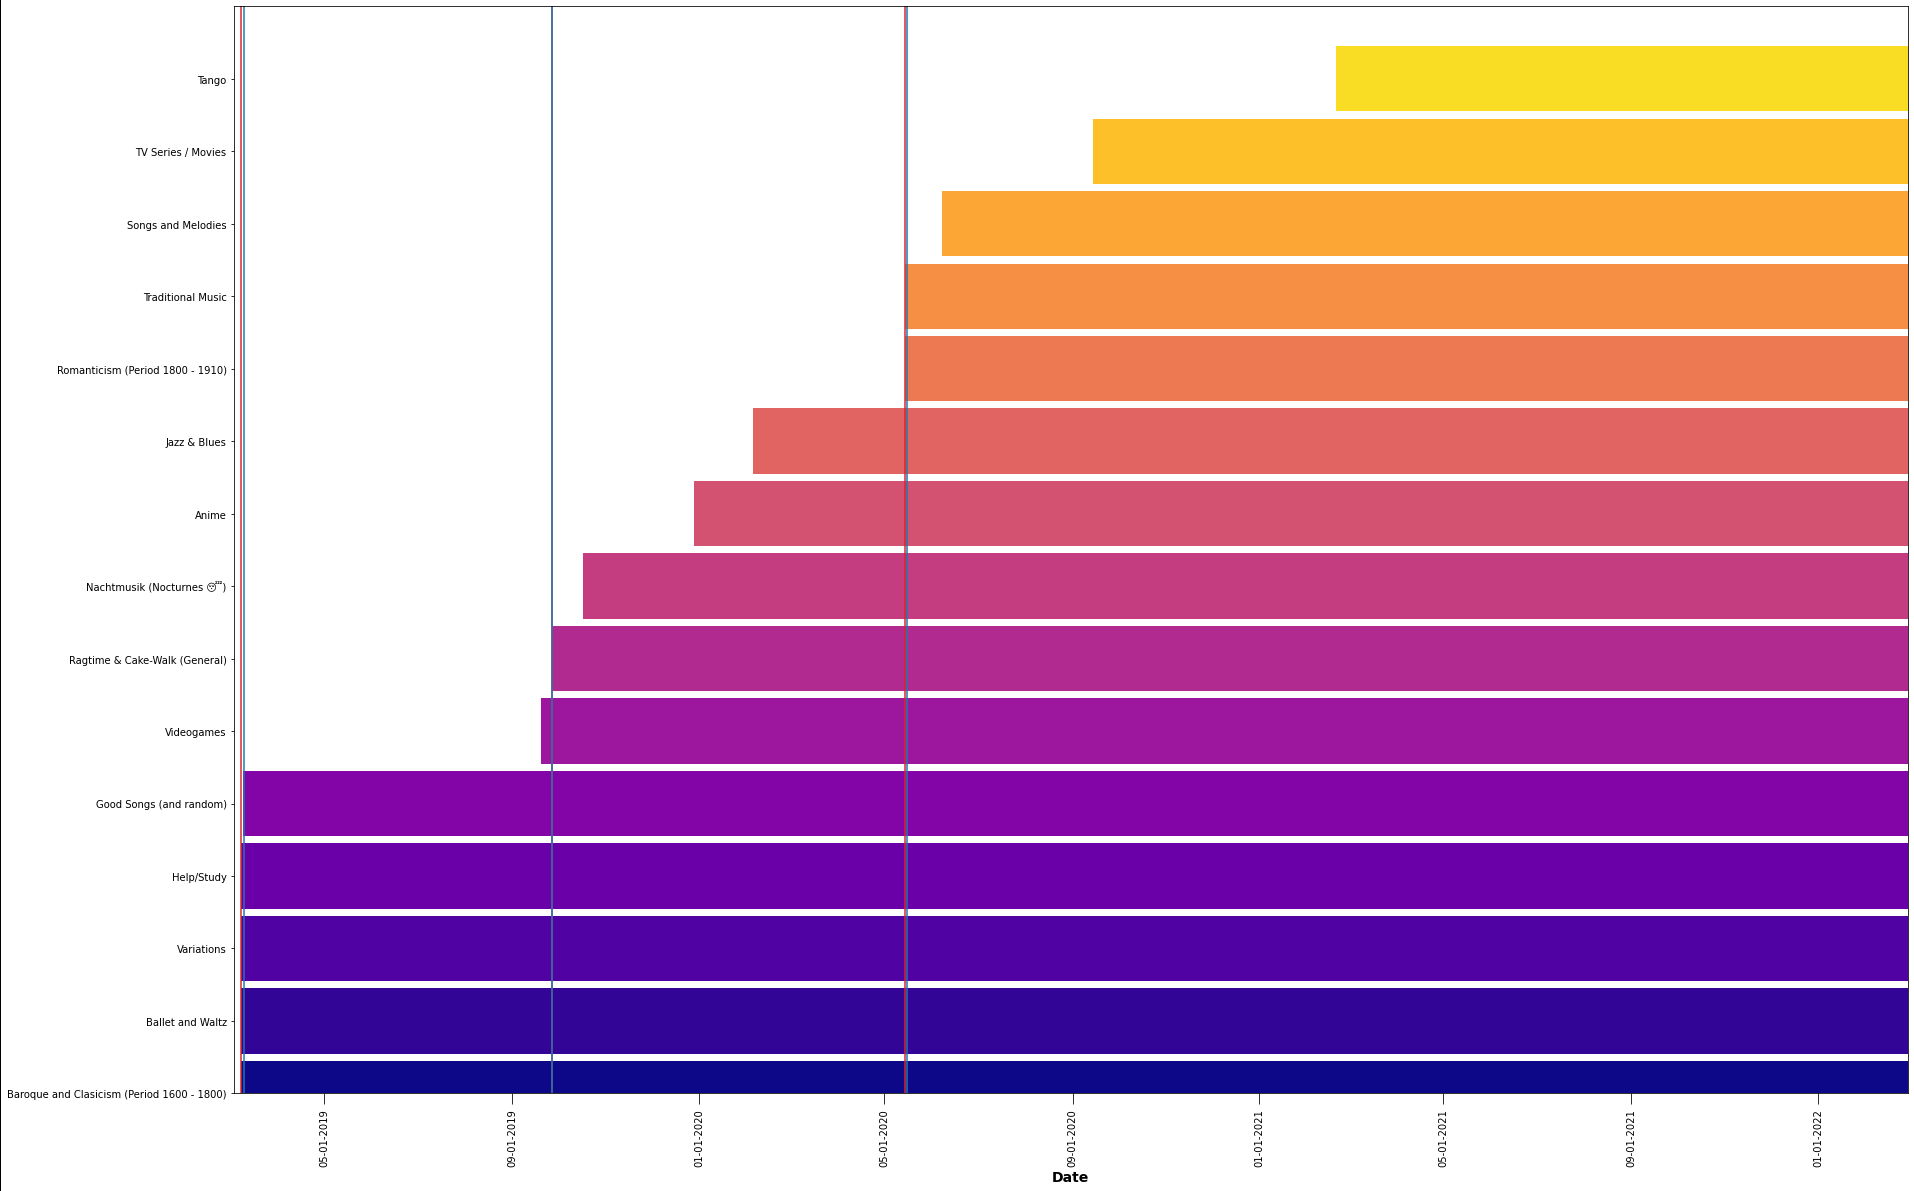

In [7]:
#Evolution of the lists of the board over time (x-axis). Each row represents a list. The vertical lines represent the structural updates (red when it starts and blue when it finishes).

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20), edgecolor="black", linewidth=1)
bomi.plot_list_diagram(filtered_result, begin_end_redesign, ax)
plt.show()


In [8]:
#Board discovery: design (lists) and use (create and close cards, flow and semantic precedence)
bd = bomi.board_discovery(df, use='id', sp_threshold=0)
bd

{'card_close_list': data.list.id
 Baroque and Clasicism (Period 1600 - 1800)    0.626984
 My Variations                                 0.015873
 Help :P/Study                                 0.015873
 Good Songs (and random)                       0.055556
 Videogames                                    0.023810
 Ragtime & Cake-Walk (General)                 0.023810
 Anime                                         0.007937
 Jazz & Blues                                  0.015873
 Romanticism (Period 1800 - 1910)              0.166667
 Traditional Music                             0.023810
 Tango                                         0.023810
 Name: id, dtype: float64, 'card_create_list': data.list.id
 Baroque and Clasicism (Period 1600 - 1800)    0.258639
 Ballet and Waltz                              0.077487
 My Variations                                 0.043979
 Help :P/Study                                 0.018848
 Good Songs (and random)                       0.203141
 Videogames

In [9]:
#Metrics
info = bomi.static_metrics(df, begin_end_redesign)
info

,events,cards,lists,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc
"(2020-05-15 18:25:08.268000, 2022-02-28 15:28:10.882000]",5119,714,15,3,5.000000,0.333333,1,8.769231,0.866667,0.068627,1.163265,290.333333,0.948179,6.509601,0.070028
"(2019-09-26 22:25:35.588000, 2020-05-14 17:37:53.393000]",1312,271,11,3,3.666667,0.333333,1,9.111111,0.818182,0.147601,1.025000,98.200000,0.937269,3.940945,0.258303
"(2019-03-09 20:03:41.247000, 2019-09-26 14:59:52.846000]",1848,275,6,2,3.000000,0.500000,1,11.200000,0.833333,0.090909,1.120000,308.200000,0.978182,5.791822,0.010909


In [10]:
# Days between redesigns
days_redesigns = pd.concat([begin_end_redesign['max'], begin_end_redesign['min'].shift(1, fill_value=df['date'].max())], keys=['first', 'last'], axis=1)
days_redesigns

,first,last
8,2020-05-15 18:25:08.268000+00:00,2022-02-28 15:28:10.882000+00:00
15,2019-09-26 22:25:35.588000+00:00,2020-05-14 17:37:53.393000+00:00
23,2019-03-09 20:03:41.247000+00:00,2019-09-26 14:59:52.846000+00:00


In [11]:
#Filtering an interval of he entire log
df_filter = df[(df["date"] > days_redesigns.iloc[2]['first']) & (df["date"] < days_redesigns.iloc[1]["last"])]
df_filter.shape

(3199, 95)

In [12]:
#Board discovery (restricted at the interval)
bomi.board_discovery(df_filter, use='id')

{'card_close_list': data.list.id
 Academic Traditional (Classic)    0.945946
 Help :P/Study                     0.013514
 Good Songs (and random)           0.040541
 Name: id, dtype: float64, 'card_create_list': data.list.id
 Academic Traditional (Classic)       0.521622
 Ballet and Waltz                     0.124324
 My Songs, Melodies and Variations    0.054054
 Help :P/Study                        0.018919
 Good Songs (and random)              0.194595
 Videogames                           0.013514
 Ragtime & Cake-Walk                  0.021622
 Nachtmusik (Nocturnes 😴)             0.013514
 Anime                                0.010811
 Jazz & Blues                         0.027027
 Name: id, dtype: float64, 'card_flow': [{'Academic Traditional (Classic)',
   'Anime',
   'Ballet and Waltz',
   'Good Songs (and random)',
   'Help :P/Study',
   'Jazz & Blues',
   'My Songs, Melodies and Variations',
   'Nachtmusik (Nocturnes 😴)',
   'Ragtime & Cake-Walk',
   'Videogames'}], 'card_use